In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import statsmodels.formula.api as smf
from scipy.stats import spearmanr


# from plot import p1, p2, p3
plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 200  # 200 e.g. is really fine, but slower


In [3]:
cols_to_drop = ['ready', 'loss', 'categorical_crossentropy', 'top_3_accuracy',
                'top_5_accuracy', 'dataset_type', 'project_id', 'duration_per_epoch', 'emissions_per_epoch']


def average_experiments(dataframe):
    #     return dataframe
#     return dataframe
    return dataframe.groupby(
        ['model', 'dataset', 'experiment', 'data_quality_dimension_percentage', 'data_quality_dimension',
         'experiment_method', 'with_random_removal']).mean().reset_index().sort_values(
        'data_quality_dimension_percentage', ascending=False)


In [4]:

baseline_time_series_df = pd.read_csv('./results/uniform/baseline.csv').assign(
    data_quality_dimension=None,
    data_quality_dimension_percentage=1,
    experiment_method=None,

)

dropping_data_time_series_uniform_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='dropping_data', experiment_method='uniform'),
    pd.read_csv('./results/uniform/dropping_data.csv')]
))
dropping_data_time_series_1_class_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='dropping_data', experiment_method='1_class'),
    pd.read_csv('./results/1_class/dropping_data.csv')]
))

completeness_time_series_uniform_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='completeness', experiment_method='uniform'),
    pd.read_csv('./results/uniform/completeness.csv')]
))
completeness_time_series_1_class_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='completeness', experiment_method='1_class'),
    pd.read_csv('./results/1_class/completeness.csv')]
))
accuracy_time_series_uniform_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='accuracy', experiment_method='uniform'),
    pd.read_csv('./results/uniform/accuracy.csv')]
))
accuracy_time_series_1_class_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='accuracy', experiment_method='1_class'),
    pd.read_csv('./results/1_class/accuracy.csv')]
))
consistency_time_series_uniform_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='consistency', experiment_method='uniform'),
    pd.read_csv('./results/uniform/consistency.csv')]
))
consistency_time_series_1_class_df = average_experiments(pd.concat([
    baseline_time_series_df.assign(data_quality_dimension='consistency', experiment_method='1_class'),
    pd.read_csv('./results/1_class/consistency.csv')]
))


baseline_time_series_df = baseline_time_series_df[baseline_time_series_df.columns
                                                  [~baseline_time_series_df.columns.isin(cols_to_drop)]]
dropping_data_time_series_uniform_df = dropping_data_time_series_uniform_df[
    dropping_data_time_series_uniform_df.columns[~dropping_data_time_series_uniform_df.columns.isin(cols_to_drop)]]
dropping_data_time_series_1_class_df = dropping_data_time_series_1_class_df[
    dropping_data_time_series_1_class_df.columns[~dropping_data_time_series_1_class_df.columns.isin(cols_to_drop)]]
accuracy_time_series_uniform_df = accuracy_time_series_uniform_df[accuracy_time_series_uniform_df.columns
                                                                  [~accuracy_time_series_uniform_df.columns.isin(
                                                                      cols_to_drop)]]
accuracy_time_series_1_class_df = accuracy_time_series_1_class_df[accuracy_time_series_1_class_df.columns
                                                                  [~accuracy_time_series_1_class_df.columns.isin(
                                                                      cols_to_drop)]]
completeness_time_series_uniform_df = completeness_time_series_uniform_df[
    completeness_time_series_uniform_df.columns[~completeness_time_series_uniform_df.columns.isin(cols_to_drop)]]
completeness_time_series_1_class_df = completeness_time_series_1_class_df[
    completeness_time_series_1_class_df.columns[~completeness_time_series_1_class_df.columns.isin(cols_to_drop)]]
consistency_time_series_uniform_df = consistency_time_series_uniform_df[
    consistency_time_series_uniform_df.columns[~consistency_time_series_uniform_df.columns.isin(cols_to_drop)]]
consistency_time_series_1_class_df = consistency_time_series_1_class_df[
    consistency_time_series_1_class_df.columns[~consistency_time_series_1_class_df.columns.isin(cols_to_drop)]]


model_dataset_pairs = baseline_time_series_df.groupby(['dataset', 'model'], as_index=False).count()[
    ['dataset', 'model']].to_numpy(dtype='str')


model_dataset_pairs = [
    ['ChlorineConcentration', 'FCN'],
    ['StarLightCurves', 'RESNET'],
    ['PhalangesOutlinesCorrect', 'MLP']
]


N_SUBPLOTS = len(model_dataset_pairs)



C:\Users\marti\AppData\Local\Temp\ipykernel_6256\521796698.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'experiment_method', 'with_random_removal']).mean().reset_index().sort_values(
C:\Users\marti\AppData\Local\Temp\ipykernel_6256\521796698.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'experiment_method', 'with_random_removal']).mean().reset_index().sort_values(
C:\Users\marti\AppData\Local\Temp\ipykernel_6256\521796698.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

# Goal 1: Show how data volume affects emissions/training time


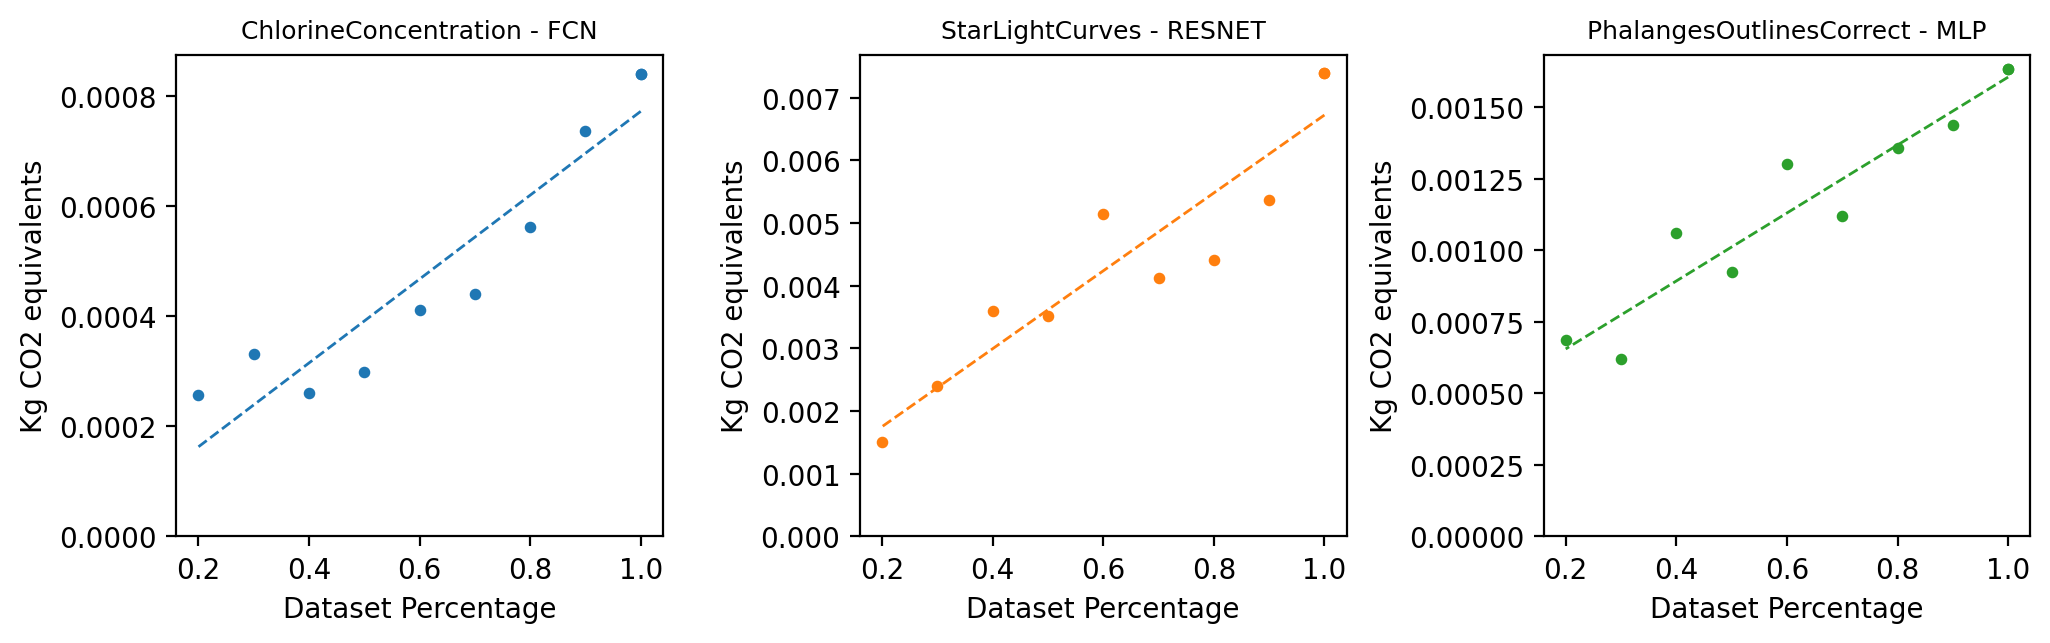

In [5]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4.0)
colors = ['tab:blue', 'tab:orange', 'tab:green']

pvalues = []

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    experiment_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}'")
    x, y = experiment_df['data_quality_dimension_percentage'], experiment_df['emissions_kg']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    results = smf.ols(formula='emissions_kg ~ p(data_quality_dimension_percentage)', data=experiment_df).fit()

    pvalues.append(['uniform', model, dataset, results.pvalues[1], spearmanr(x, y)])
    
    ax = axs[i]
    ax.scatter(x, y, c=colors[i], s=10)
    ax.plot(x,p(x),"--", c=colors[i], linewidth=1)
    
    
    
    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0,ax.get_ylim()[-1]))
    
for ax in axs.flat:
    ax.set(xlabel='Dataset Percentage', ylabel='Kg CO2 equivalents')

plt.show()



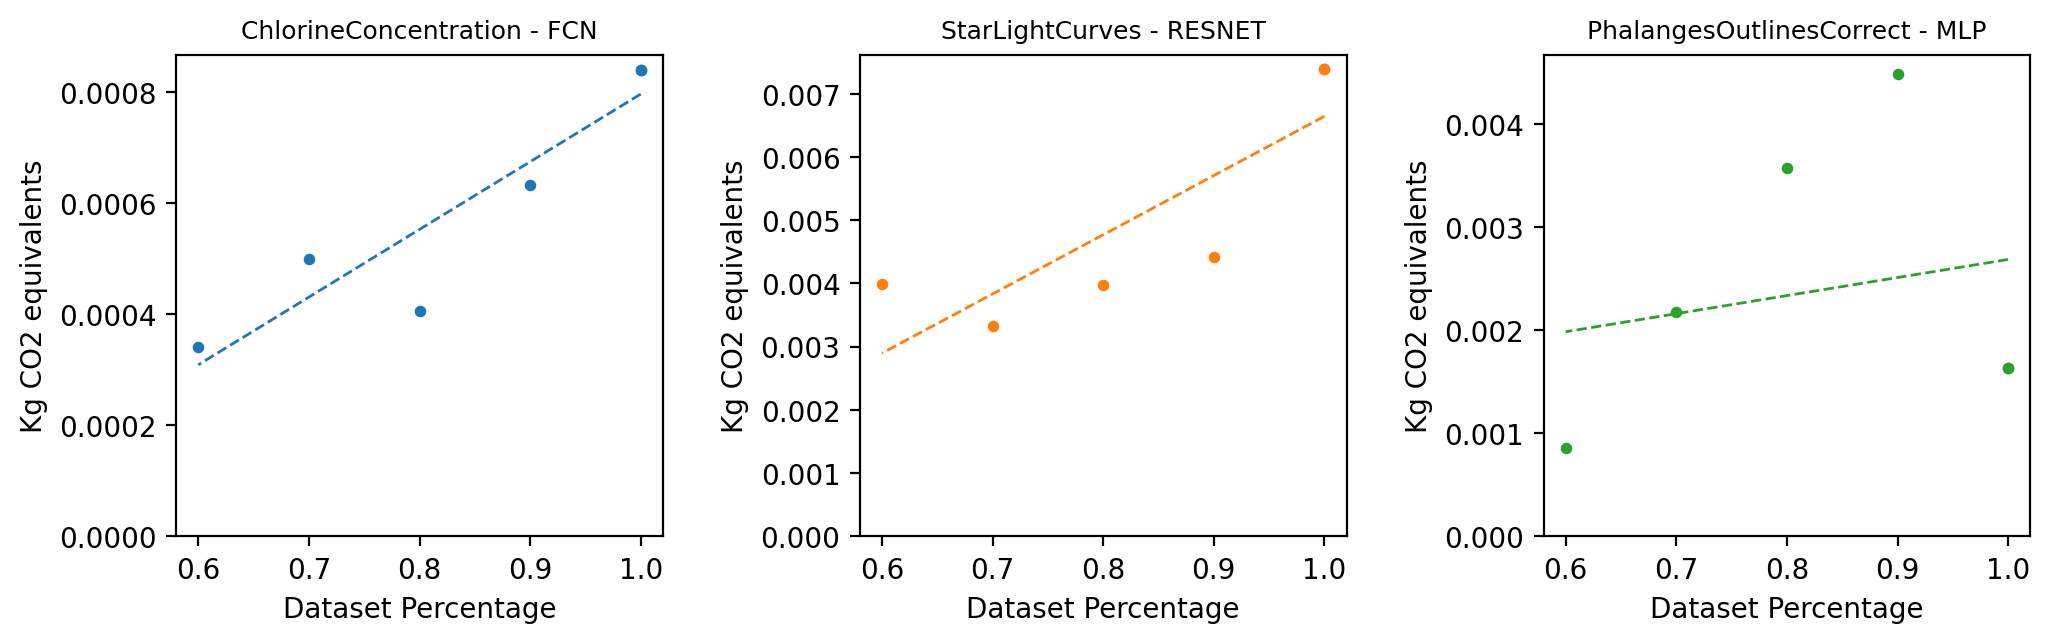

In [6]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4.0)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:blue',
          'tab:orange', 'tab:green', 'tab:blue', 'tab:orange', 'tab:green']

pvalues = []

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    experiment_df = dropping_data_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}'")
    x, y = experiment_df['data_quality_dimension_percentage'], experiment_df['emissions_kg']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    results = smf.ols(formula='emissions_kg ~ p(data_quality_dimension_percentage)', data=experiment_df).fit()

    pvalues.append(['1_class', model, dataset, results.pvalues[1], spearmanr(x, y)])

    ax = axs[i]
    ax.scatter(x, y, c=colors[i], s=10)
    ax.plot(x, p(x), "--", c=colors[i], linewidth=1)

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, ax.get_ylim()[-1]))

for ax in axs.flat:
    ax.set(xlabel='Dataset Percentage', ylabel='Kg CO2 equivalents')

plt.show()


# Goal 2

## Data volume vs Performance

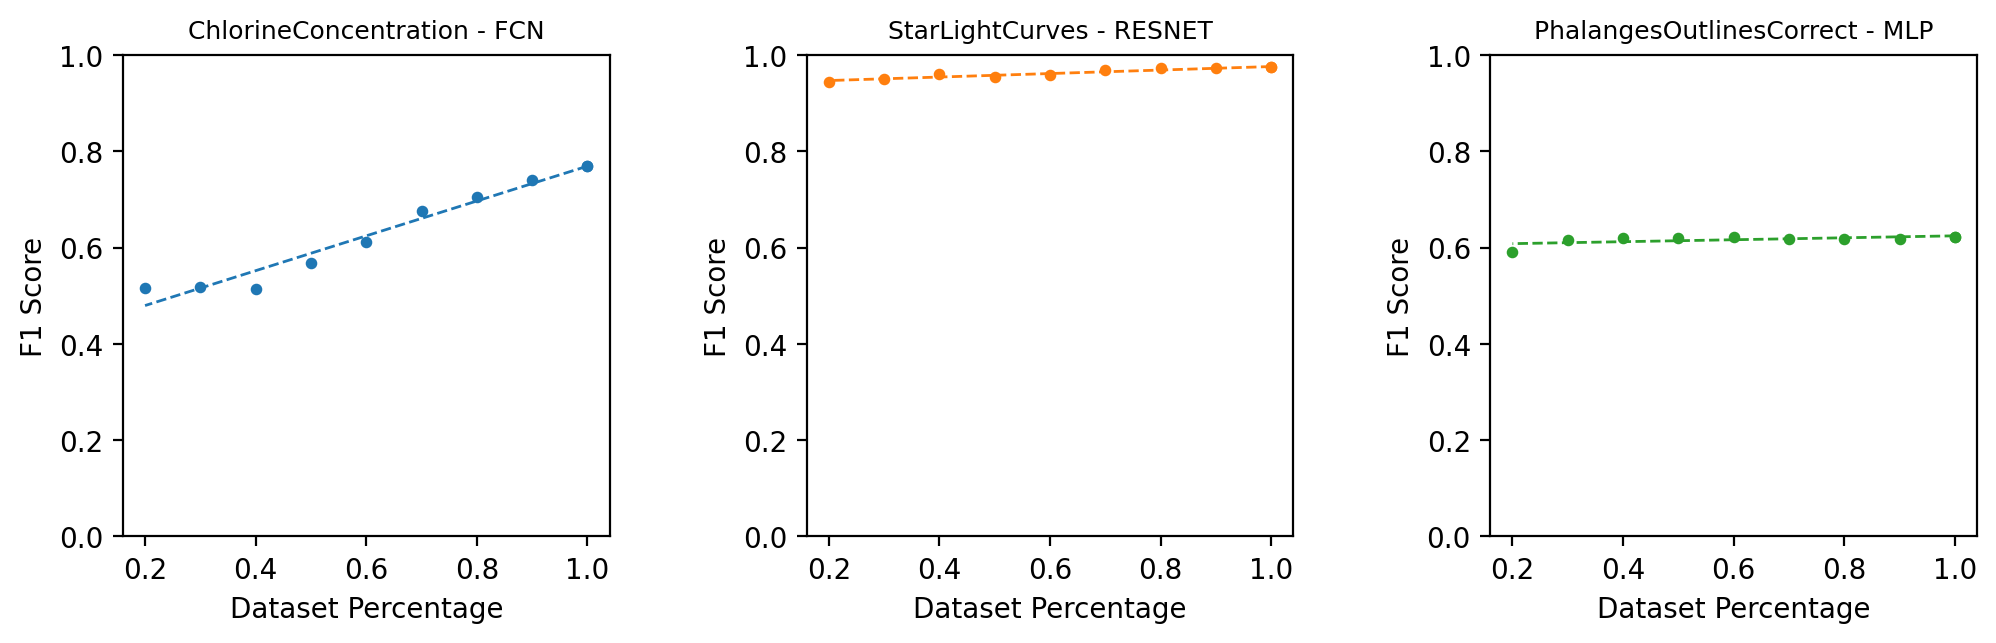

In [7]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4.0)

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    experiment_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}'")
    x, y = experiment_df['data_quality_dimension_percentage'], experiment_df['f1_score']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    results = smf.ols(formula='f1_score ~ p(data_quality_dimension_percentage)', data=experiment_df).fit()


    ax = axs[i]
    ax.scatter(x, y, c=colors[i], s=10)
    ax.plot(x, p(x), "--", c=colors[i], linewidth=1)

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, 1))

for ax in axs.flat:
    ax.set(xlabel='Dataset Percentage', ylabel='F1 Score')

plt.show()


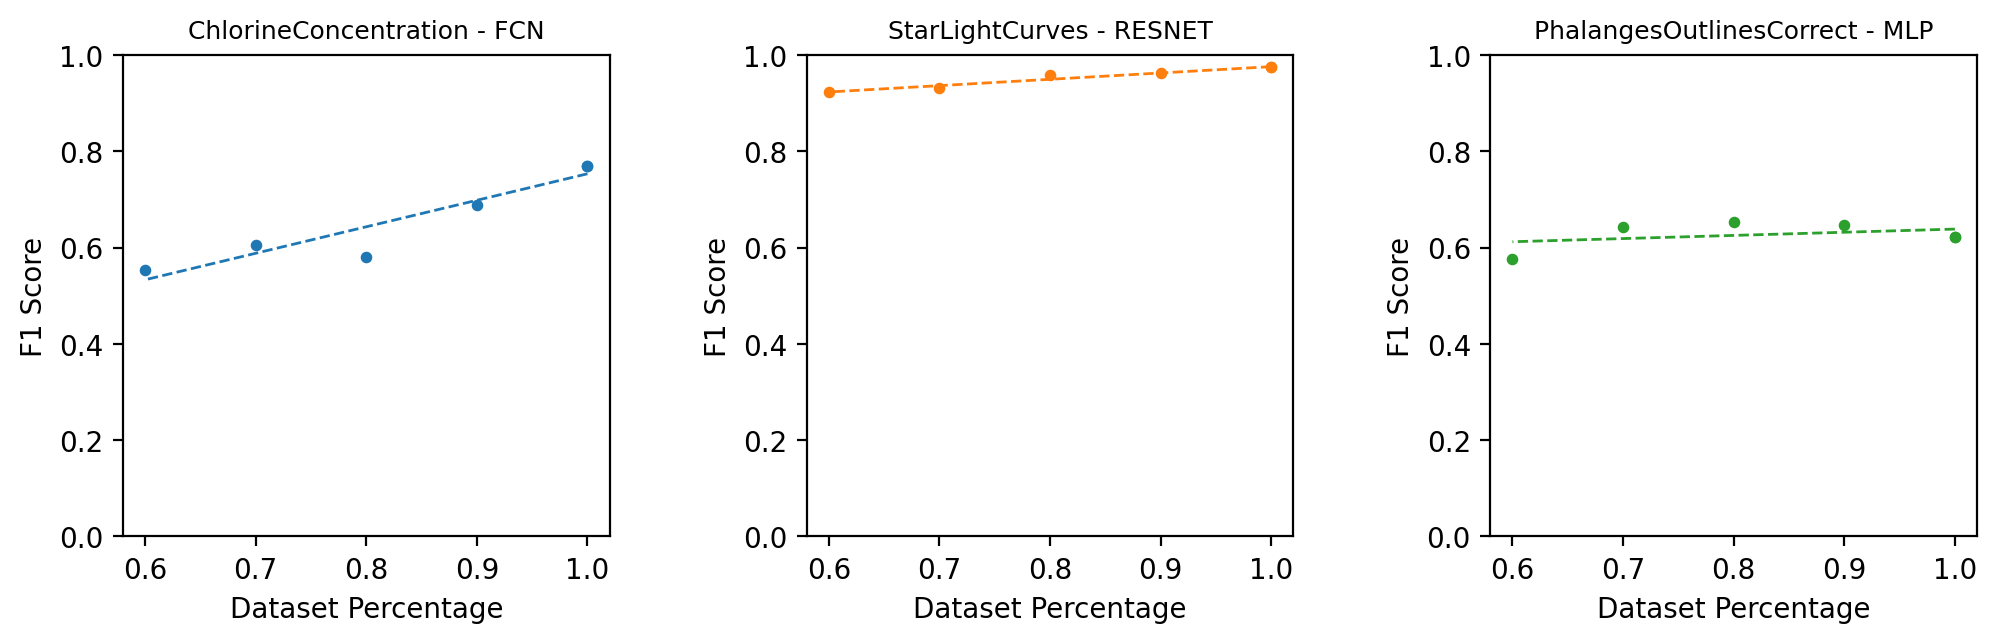

In [8]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4.0)
colors = ['tab:blue', 'tab:orange', 'tab:green']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    experiment_df = dropping_data_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}'")
    x, y = experiment_df['data_quality_dimension_percentage'], experiment_df['f1_score']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    results = smf.ols(formula='f1_score ~ p(data_quality_dimension_percentage)', data=experiment_df).fit()

    ax = axs[i]
    ax.scatter(x, y, c=colors[i], s=10)
    ax.plot(x, p(x), "--", c=colors[i], linewidth=1)

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, 1))

for ax in axs.flat:
    ax.set(xlabel='Dataset Percentage', ylabel='F1 Score')

plt.show()


## Smart cleaning vs Random Cleaning

### Completeness

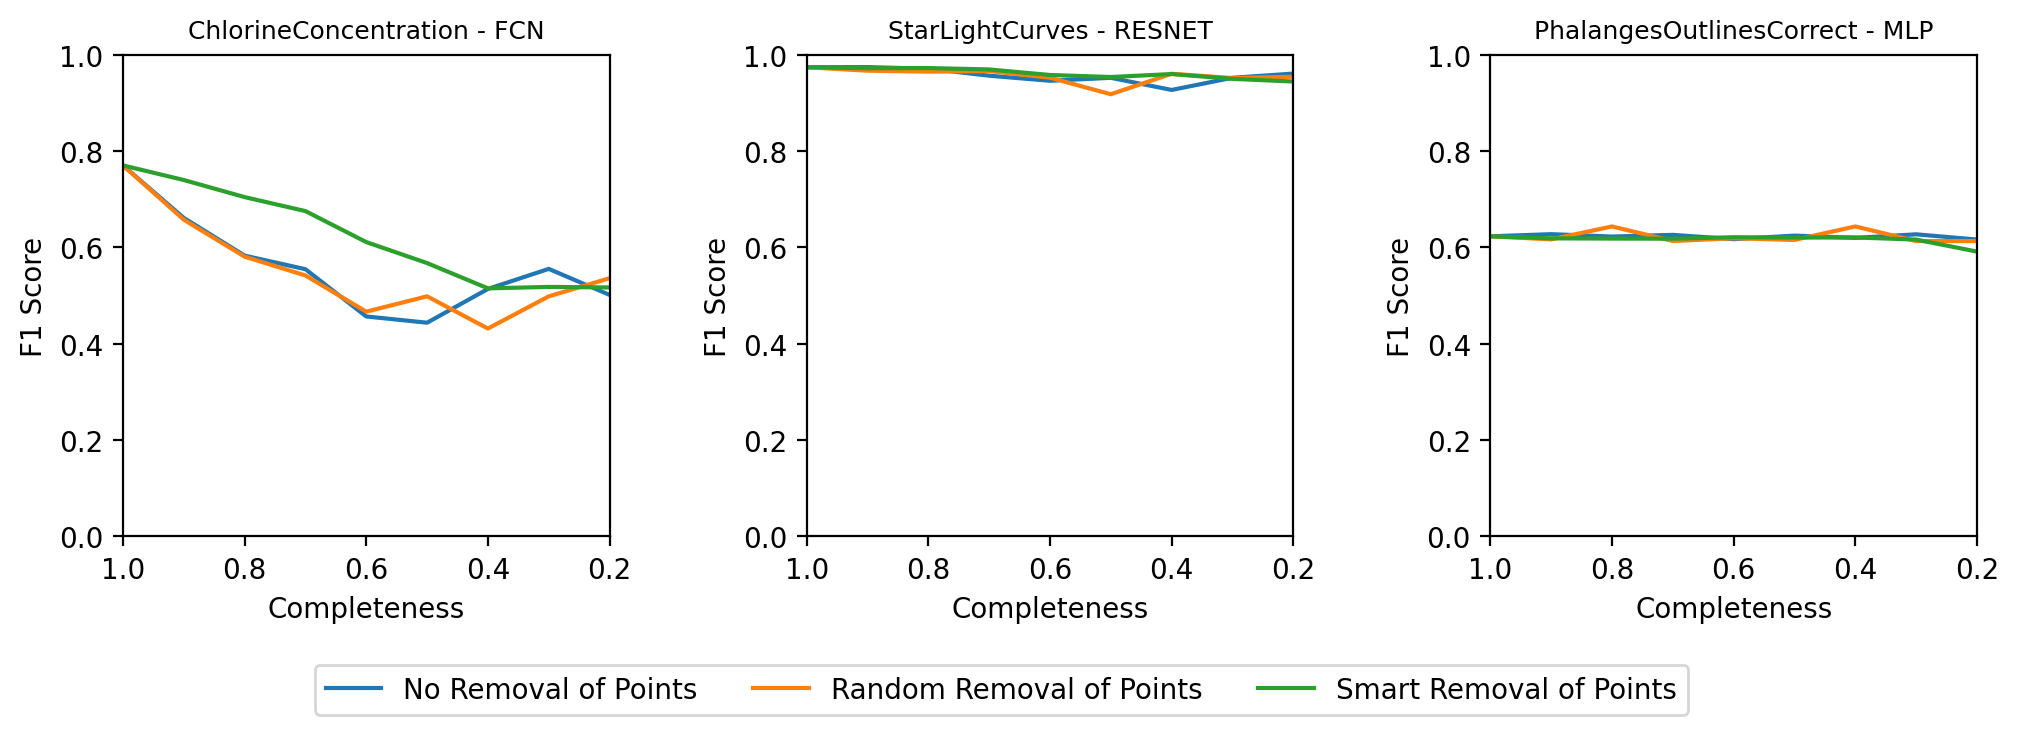

In [9]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    completeness_experiment_df = completeness_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    completeness_random_removal_experiment_df = completeness_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == True")
    completeness_smart_removal_experiment_df = dropping_data_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}'")

    completeness_x, completeness_y = completeness_experiment_df[
        'data_quality_dimension_percentage'], completeness_experiment_df['f1_score']
    completeness_random_removal_x, completeness_random_removal_y = completeness_random_removal_experiment_df[
        'data_quality_dimension_percentage'], completeness_random_removal_experiment_df['f1_score']
    completeness_smart_removal_x, completeness_smart_removal_y = completeness_smart_removal_experiment_df[
        'data_quality_dimension_percentage'], completeness_smart_removal_experiment_df['f1_score']
    ax = axs[i]

    ax.plot(completeness_x, completeness_y, c=colors[0], label='No Removal of Points')
    ax.plot(completeness_random_removal_x, completeness_random_removal_y, c=colors[1], label='Random Removal of Points')
    ax.plot(completeness_smart_removal_x, completeness_smart_removal_y, c=colors[2], label='Smart Removal of Points')


    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, 1))
    ax.set_xlim((1, 0.2))


for ax in axs.flat:
    ax.set(xlabel='Completeness', ylabel='F1 Score')
    
# fig.suptitle('DQ Dimension - Completeness', fontsize=14, y=1.1)


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


### Accuracy

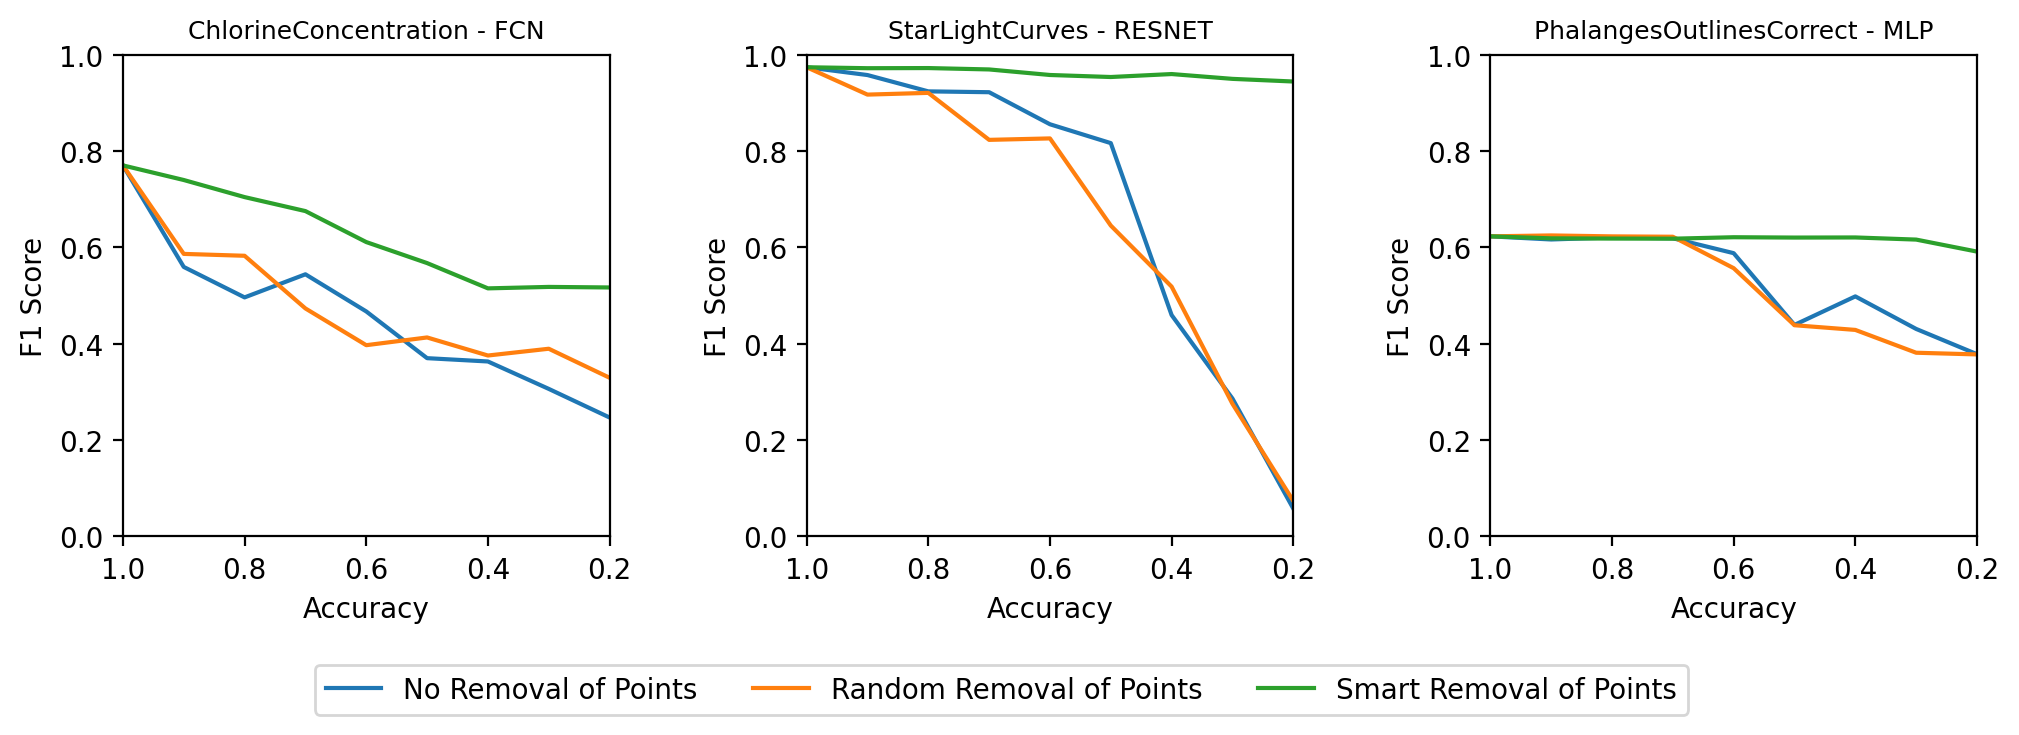

In [10]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    accuracy_experiment_df = accuracy_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    accuracy_random_removal_experiment_df = accuracy_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == True")
    accuracy_smart_removal_experiment_df = dropping_data_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}'")

    accuracy_x, accuracy_y = accuracy_experiment_df[
        'data_quality_dimension_percentage'], accuracy_experiment_df['f1_score']
    accuracy_random_removal_x, accuracy_random_removal_y = accuracy_random_removal_experiment_df[
        'data_quality_dimension_percentage'], accuracy_random_removal_experiment_df['f1_score']
    accuracy_smart_removal_x, accuracy_smart_removal_y = accuracy_smart_removal_experiment_df[
        'data_quality_dimension_percentage'], accuracy_smart_removal_experiment_df['f1_score']
    ax = axs[i]

    ax.plot(accuracy_x, accuracy_y, c=colors[0], label='No Removal of Points')
    ax.plot(accuracy_random_removal_x, accuracy_random_removal_y, c=colors[1], label='Random Removal of Points')
    ax.plot(accuracy_smart_removal_x, accuracy_smart_removal_y, c=colors[2], label='Smart Removal of Points')

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, 1))
    ax.set_xlim((1, 0.2))


for ax in axs.flat:
    ax.set(xlabel='Accuracy', ylabel='F1 Score')


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


### Consistency

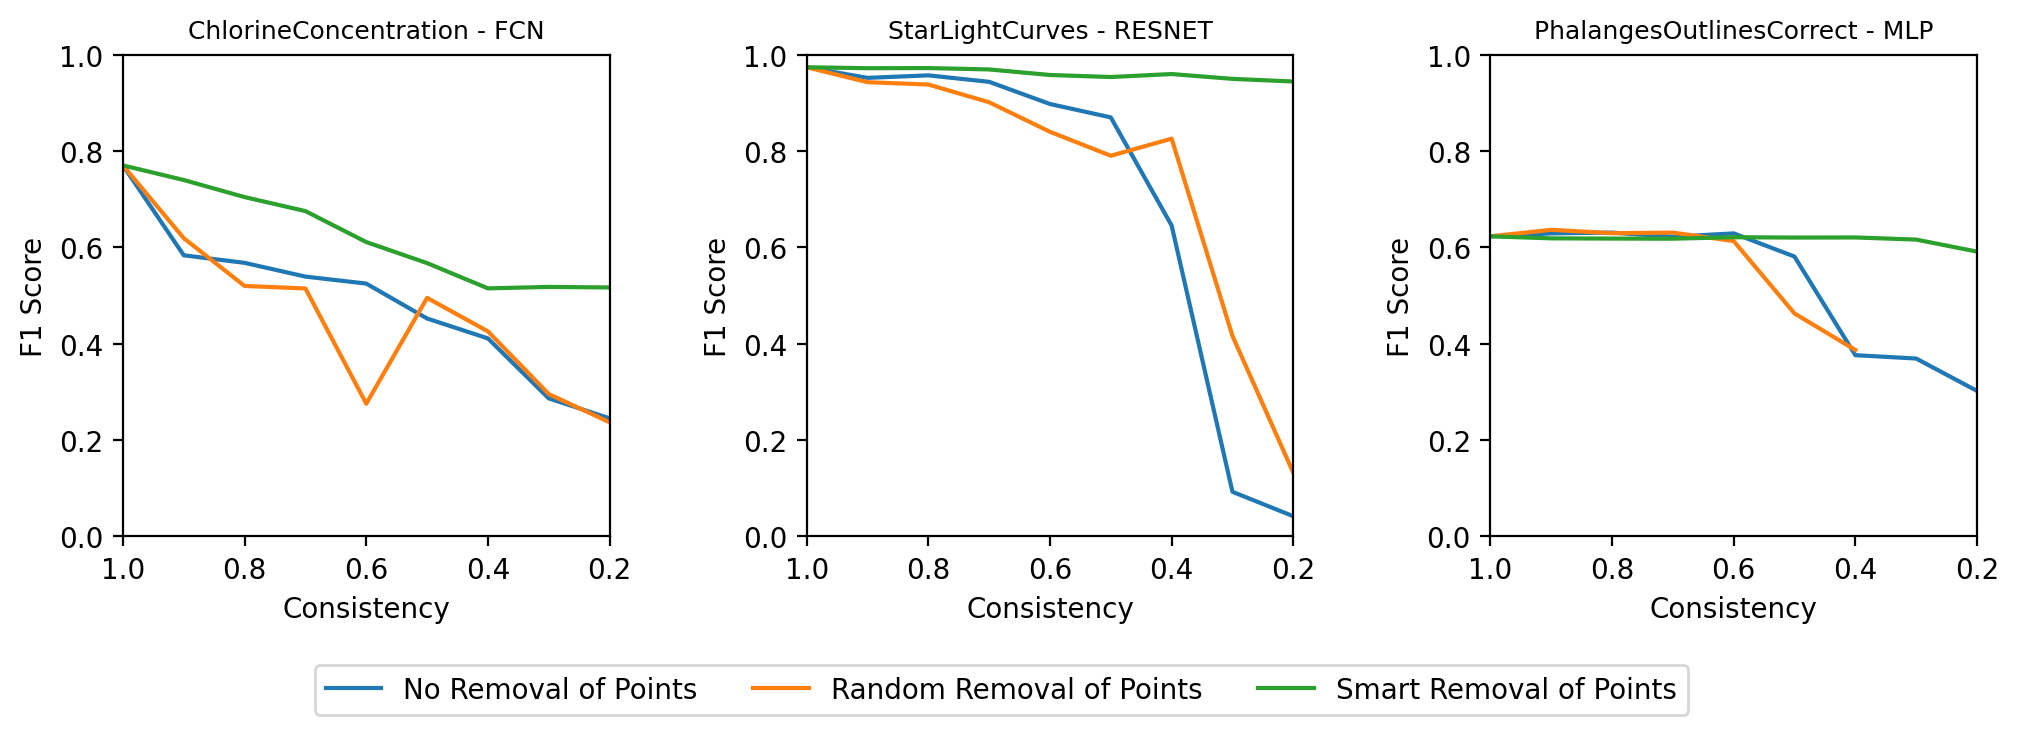

In [11]:
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    consistency_experiment_df = consistency_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    consistency_random_removal_experiment_df = consistency_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}' and with_random_removal == True")
    consistency_smart_removal_experiment_df = dropping_data_time_series_uniform_df.query(
        f"model=='{model}' and dataset=='{dataset}'")

    consistency_x, consistency_y = consistency_experiment_df[
        'data_quality_dimension_percentage'], consistency_experiment_df['f1_score']
    consistency_random_removal_x, consistency_random_removal_y = consistency_random_removal_experiment_df[
        'data_quality_dimension_percentage'], consistency_random_removal_experiment_df['f1_score']
    consistency_smart_removal_x, consistency_smart_removal_y = consistency_smart_removal_experiment_df[
        'data_quality_dimension_percentage'], consistency_smart_removal_experiment_df['f1_score']
    ax = axs[i]

    ax.plot(consistency_x, consistency_y, c=colors[0], label='No Removal of Points')
    ax.plot(consistency_random_removal_x, consistency_random_removal_y, c=colors[1], label='Random Removal of Points')
    ax.plot(consistency_smart_removal_x, consistency_smart_removal_y, c=colors[2], label='Smart Removal of Points')

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0, 1))
    ax.set_xlim((1, 0.2))


for ax in axs.flat:
    ax.set(xlabel='Consistency', ylabel='F1 Score')

# fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


## DQ Dimensions Ranking on smart cleaning


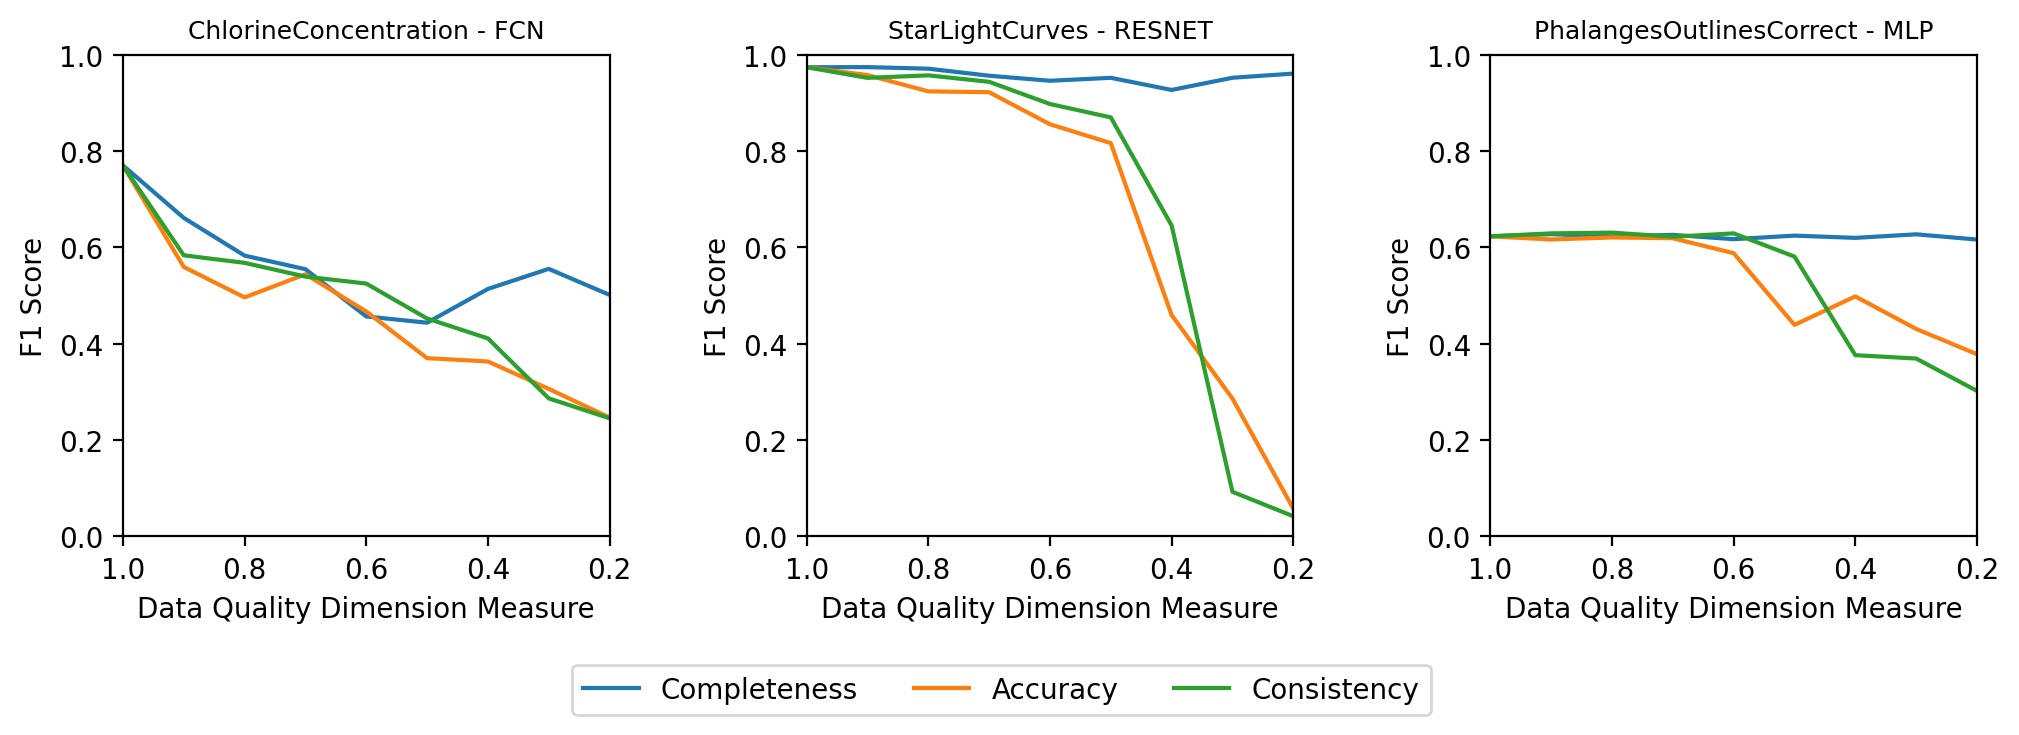

In [12]:
# SAVED PLOT FOR LATER
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    cleaning_experiment_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    completeness_experiment_df = completeness_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    accuracy_experiment_df = accuracy_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    consistency_experiment_df = consistency_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")

    
    cleaning_x, cleaning_y, cleaning_y2 = cleaning_experiment_df['data_quality_dimension_percentage'], cleaning_experiment_df['f1_score'], cleaning_experiment_df['emissions_kg']
    completeness_x, completeness_y, completeness_y2 = completeness_experiment_df['data_quality_dimension_percentage'], completeness_experiment_df['f1_score'], completeness_experiment_df['emissions_kg']
    accuracy_x, accuracy_y, accuracy_y2 = accuracy_experiment_df['data_quality_dimension_percentage'], accuracy_experiment_df['f1_score'], accuracy_experiment_df['emissions_kg']
    consistency_x, consistency_y, consistency_y2 = consistency_experiment_df['data_quality_dimension_percentage'], consistency_experiment_df['f1_score'], consistency_experiment_df['emissions_kg']

    ax = axs[i]

#     ax.plot(cleaning_x, cleaning_y, c=colors[0], label='Cleaning')
    ax.plot(completeness_x, completeness_y, c=colors[0], label='Completeness')
    ax.plot(accuracy_x, accuracy_y, c=colors[1], label='Accuracy')
    ax.plot(consistency_x, consistency_y, c=colors[2], label='Consistency')

#     ax.legend()

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0,1))
    ax.set_xlim((1, 0.2))


for ax in axs.flat:
    ax.set(xlabel='Data Quality Dimension Measure', ylabel='F1 Score')


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


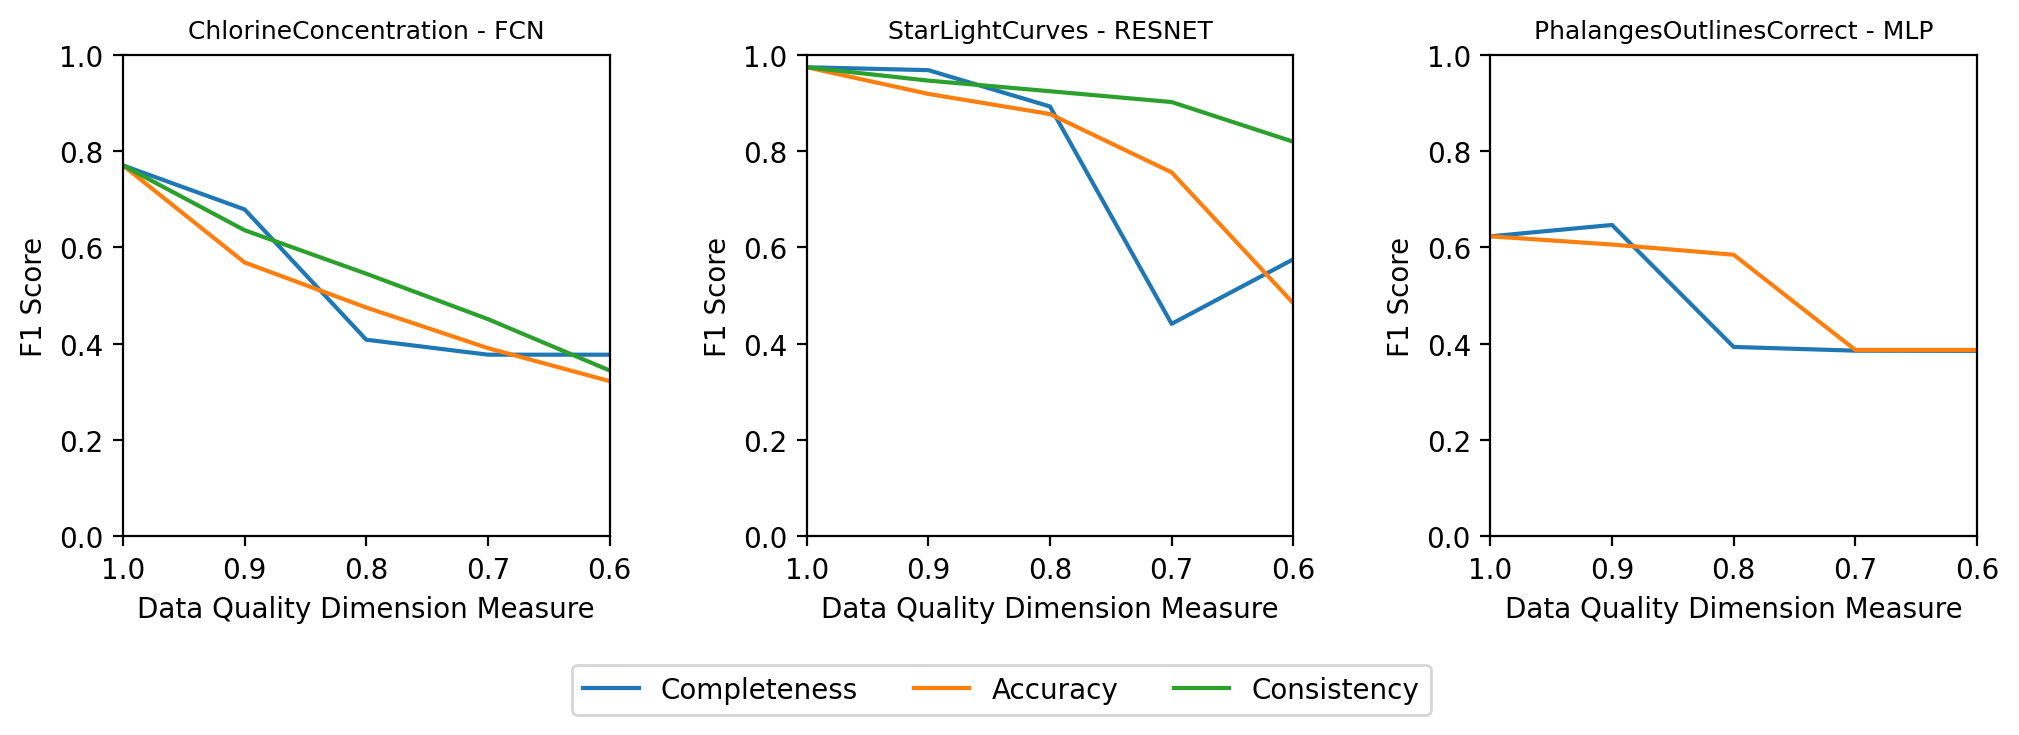

In [13]:
# SAVED PLOT FOR LATER
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    completeness_experiment_df = completeness_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    accuracy_experiment_df = accuracy_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    consistency_experiment_df = consistency_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")

    completeness_x, completeness_y = completeness_experiment_df[
        'data_quality_dimension_percentage'], completeness_experiment_df['f1_score']
    accuracy_x, accuracy_y = accuracy_experiment_df['data_quality_dimension_percentage'], accuracy_experiment_df['f1_score']
    consistency_x, consistency_y = consistency_experiment_df['data_quality_dimension_percentage'], consistency_experiment_df['f1_score']

    ax = axs[i]

    ax.plot(completeness_x, completeness_y, c=colors[0], label='Completeness')
    ax.plot(accuracy_x, accuracy_y, c=colors[1], label='Accuracy')
    ax.plot(consistency_x, consistency_y, c=colors[2], label='Consistency')

#     ax.legend()

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_ylim((0,1))
    ax.set_xlim((1, 0.6))


for ax in axs.flat:
    ax.set(xlabel='Data Quality Dimension Measure', ylabel='F1 Score')


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


## DQ Dimensions Ranking on emissions


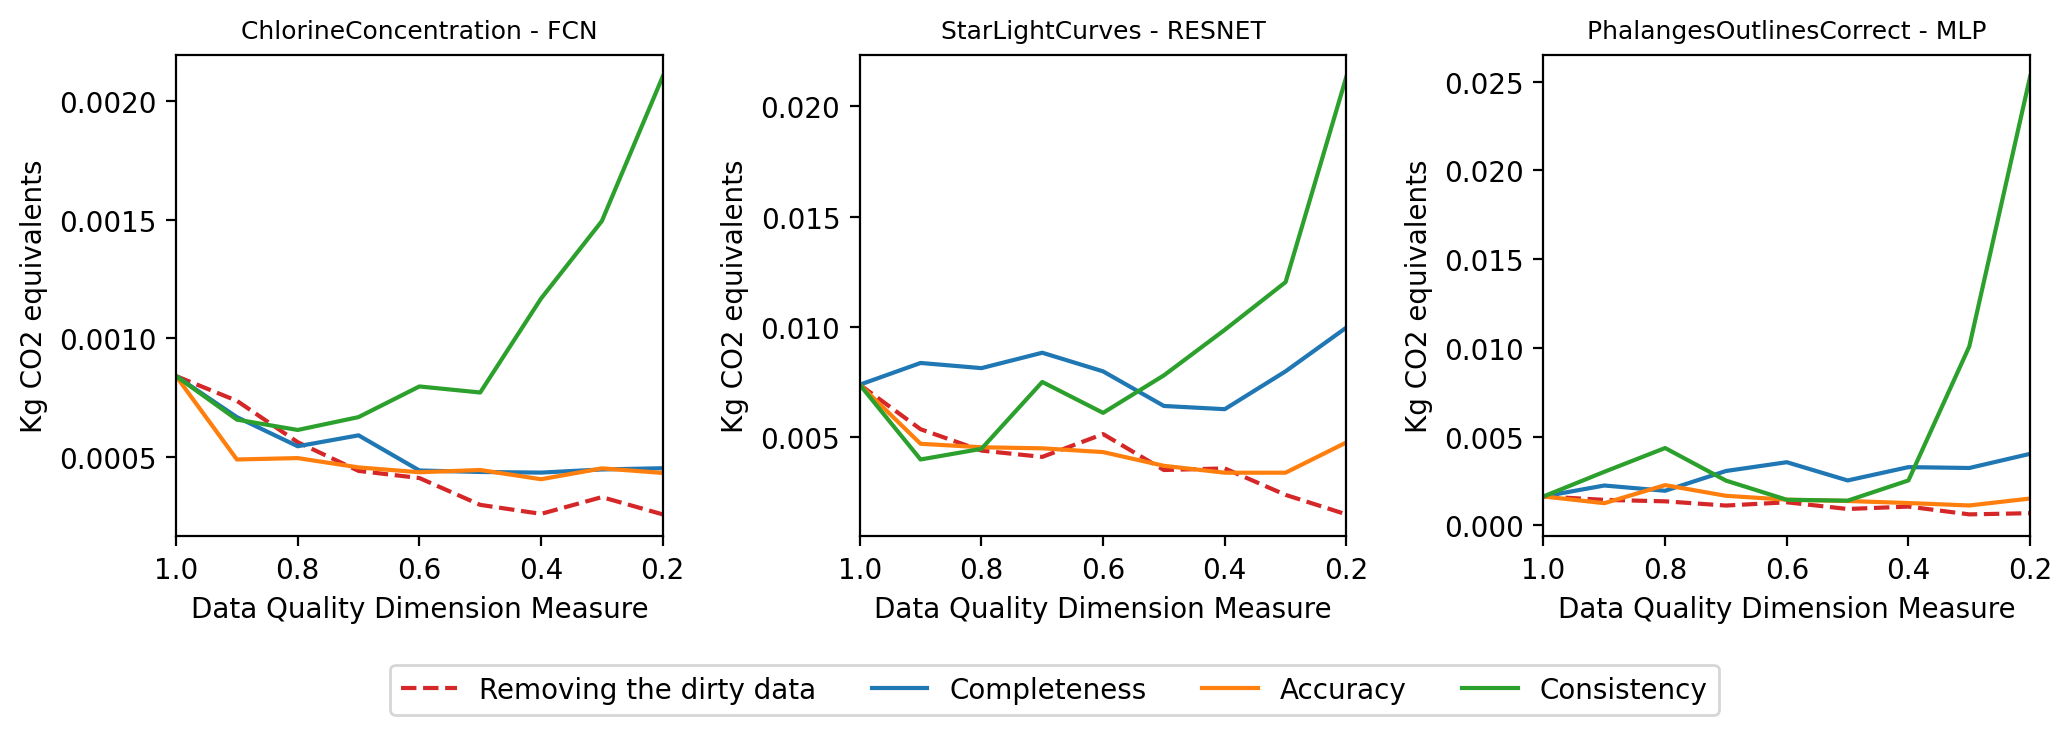

In [14]:
# SAVED PLOT FOR LATER
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    cleaning_experiment_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    completeness_experiment_df = completeness_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    accuracy_experiment_df = accuracy_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    consistency_experiment_df = consistency_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")

    
    cleaning_x, cleaning_y, cleaning_y2 = cleaning_experiment_df['data_quality_dimension_percentage'], cleaning_experiment_df['f1_score'], cleaning_experiment_df['emissions_kg']
    completeness_x, completeness_y, completeness_y2 = completeness_experiment_df['data_quality_dimension_percentage'], completeness_experiment_df['f1_score'], completeness_experiment_df['emissions_kg']
    accuracy_x, accuracy_y, accuracy_y2 = accuracy_experiment_df['data_quality_dimension_percentage'], accuracy_experiment_df['f1_score'], accuracy_experiment_df['emissions_kg']
    consistency_x, consistency_y, consistency_y2 = consistency_experiment_df['data_quality_dimension_percentage'], consistency_experiment_df['f1_score'], consistency_experiment_df['emissions_kg']

    ax = axs[i]

    ax.plot(cleaning_x, cleaning_y2, c=colors[3], linestyle='--' ,label='Removing the dirty data')
    ax.plot(completeness_x, completeness_y2, c=colors[0], label='Completeness')
    ax.plot(accuracy_x, accuracy_y2, c=colors[1], label='Accuracy')
    ax.plot(consistency_x, consistency_y2, c=colors[2], label='Consistency')

#     ax.legend()

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_xlim((1, 0.2))


for ax in axs.flat:
    ax.set(xlabel='Data Quality Dimension Measure', ylabel='Kg CO2 equivalents')


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


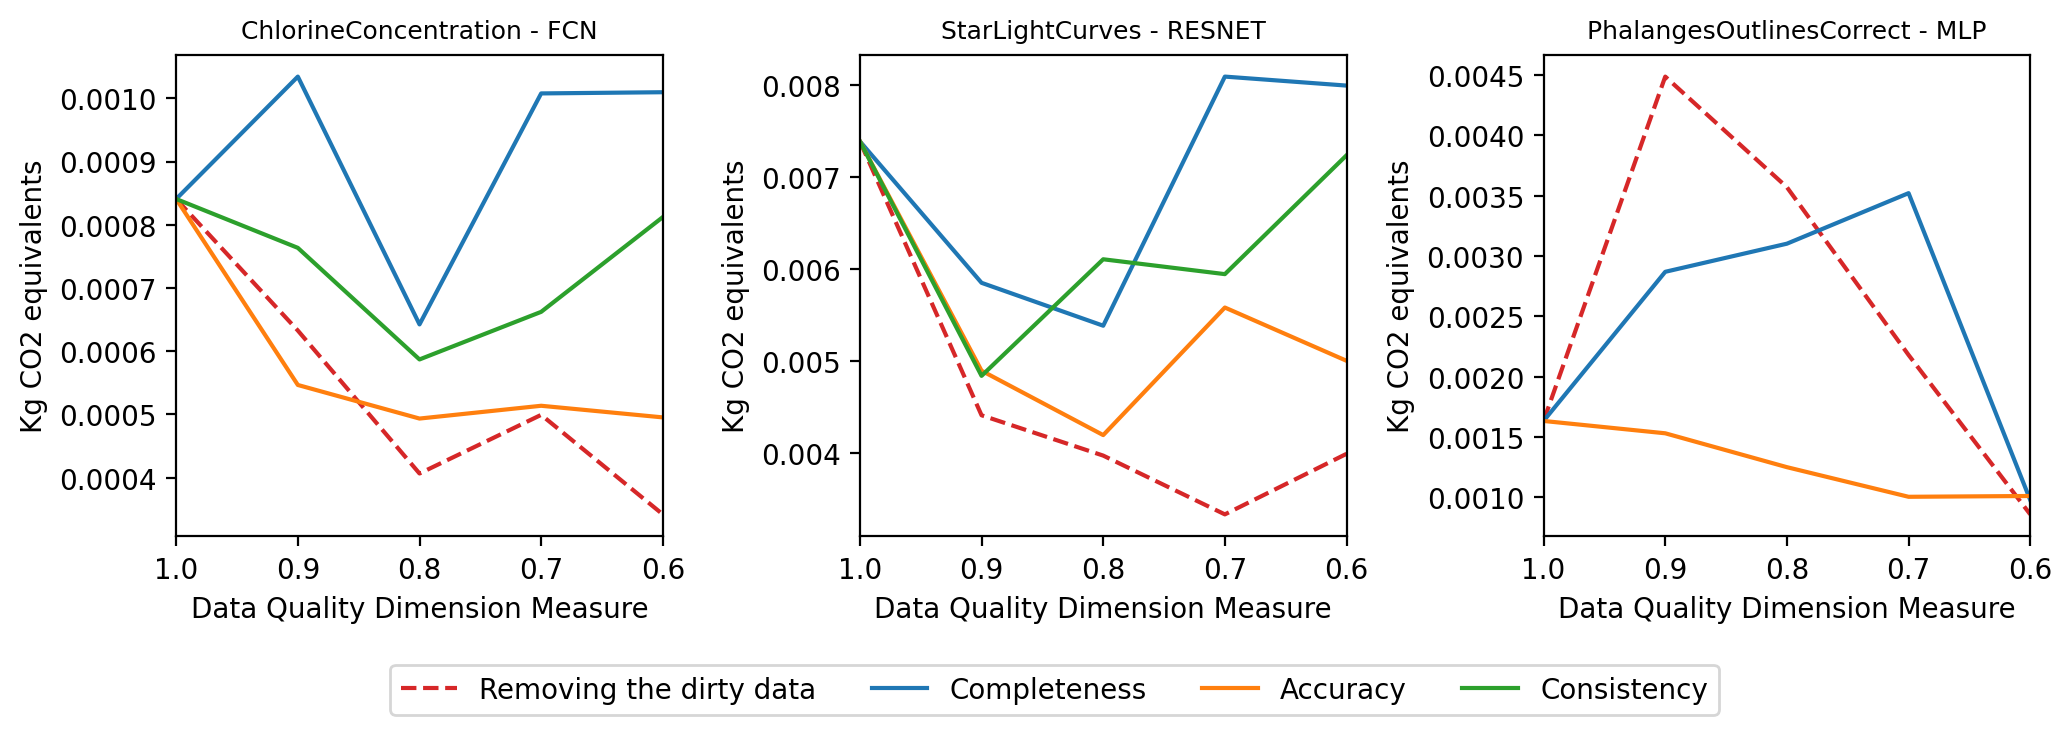

In [15]:
# SAVED PLOT FOR LATER
fig, axs = plt.subplots(1, N_SUBPLOTS)
fig.tight_layout(w_pad=4)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for index, (dataset, model) in enumerate(model_dataset_pairs):
    i = index

    cleaning_experiment_df = dropping_data_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    completeness_experiment_df = completeness_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    accuracy_experiment_df = accuracy_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")
    consistency_experiment_df = consistency_time_series_1_class_df.query(f"model=='{model}' and dataset=='{dataset}' and with_random_removal == False")

    
    cleaning_x, cleaning_y, cleaning_y2 = cleaning_experiment_df['data_quality_dimension_percentage'], cleaning_experiment_df['f1_score'], cleaning_experiment_df['emissions_kg']
    completeness_x, completeness_y, completeness_y2 = completeness_experiment_df['data_quality_dimension_percentage'], completeness_experiment_df['f1_score'], completeness_experiment_df['emissions_kg']
    accuracy_x, accuracy_y, accuracy_y2 = accuracy_experiment_df['data_quality_dimension_percentage'], accuracy_experiment_df['f1_score'], accuracy_experiment_df['emissions_kg']
    consistency_x, consistency_y, consistency_y2 = consistency_experiment_df['data_quality_dimension_percentage'], consistency_experiment_df['f1_score'], consistency_experiment_df['emissions_kg']

    ax = axs[i]

    ax.plot(cleaning_x, cleaning_y2, c=colors[3], linestyle='--' ,label='Removing the dirty data')
    ax.plot(completeness_x, completeness_y2, c=colors[0], label='Completeness')
    ax.plot(accuracy_x, accuracy_y2, c=colors[1], label='Accuracy')
    ax.plot(consistency_x, consistency_y2, c=colors[2], label='Consistency')

#     ax.legend()

    ax.set_title(f"{dataset} - {model}", fontsize=9)
    ax.set_xlim((1, 0.6))


for ax in axs.flat:
    ax.set(xlabel='Data Quality Dimension Measure', ylabel='Kg CO2 equivalents')


axs[1].legend(loc='lower center', ncol=4, fancybox=True, bbox_to_anchor=(0.4, -0.4))
plt.show()


# Extra measures

In [16]:
# Score decrease vs emissions decrease

for index, (model, dataset) in enumerate(model_dataset_pairs):
    e_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}'")
    
    half_data_df = e_df.query("data_quality_dimension_percentage == 0.5")
    full_data_df = e_df.query("data_quality_dimension_percentage == 1")
    
    half_score, half_emissions = half_data_df[['f1_score', 'emissions_kg']].to_numpy()[0]
    full_score, full_emissions = full_data_df[['f1_score', 'emissions_kg']].to_numpy()[0]
    
    score_decrease = (full_score - half_score)
    emissions_decrease = (half_emissions - full_emissions)/full_emissions
    
    print(model, dataset, score_decrease, emissions_decrease)
    


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Score decrease vs emissions decrease

for index, (model, dataset) in enumerate(model_dataset_pairs):
    e_df = dropping_data_time_series_uniform_df.query(f"model=='{model}' and dataset=='{dataset}'")
    
    half_data_df = e_df.query("data_quality_dimension_percentage == 0.5")
    full_data_df = e_df.query("data_quality_dimension_percentage == 1")
    
    half_score, half_emissions = half_data_df[['f1_score', 'emissions_kg']].to_numpy()[0]
    full_score, full_emissions = full_data_df[['f1_score', 'emissions_kg']].to_numpy()[0]
    
    score_decrease = (full_score - half_score)
    emissions_decrease = (half_emissions - full_emissions)/full_emissions
    
    print(model, dataset, score_decrease, emissions_decrease)
    
